In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Object 1: Found
Object 2: Found
Object 3: Found
Object 4: Not enough matches are found - 6/7
Object 5: Found
Object 6: Not enough matches are found - 2/7
Object 7: Found
Object 8: Found
Object 9: Not enough matches are found - 1/7
Object 10: Found
Object 11: Found
Object 12: Found


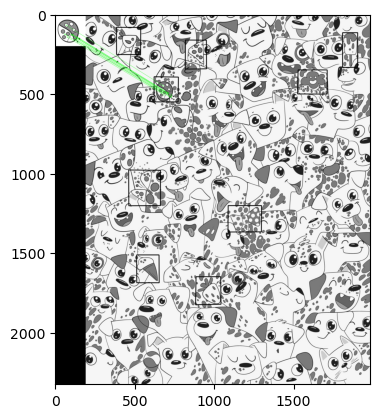

(<matplotlib.image.AxesImage at 0x1ebd46e2f50>, None)

In [10]:
img = cv.imread("picture\\dog.jpg", cv.IMREAD_GRAYSCALE)
FLANN_INDEX_KDTREE = 1
index_params= dict(algorithm = FLANN_INDEX_KDTREE,
                   tree = 5)
search_params = dict(checks=10000)

sift = cv.SIFT_create()

kp_img, des_img = sift.detectAndCompute(img, None)

flann = cv.FlannBasedMatcher(index_params, search_params)

for i in range(1, 13):
    obj = cv.imread(f"picture\\obj\\obj{i}.png", cv.IMREAD_GRAYSCALE)
    kp_obj, des_obj = sift.detectAndCompute(obj, None)
    matches = flann.knnMatch(des_obj, des_img, k = 2)

    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)

    MIN_MATCH_COUNT = 7

    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp_obj[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp_img[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
    
        h,w = obj.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv.perspectiveTransform(pts,M)
    
        img2 = cv.polylines(img,[np.int32(dst)],True,0,3, cv.LINE_AA)
        print(f"Object {i}: Found")
    else:
        print( "Object {}: Not enough matches are found - {}/{}".format(i, len(good), MIN_MATCH_COUNT) )
        matchesMask = None

    draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = None,
                    matchesMask = matchesMask,
                    flags = 2)

    result = cv.drawMatches(obj, kp_obj, img, kp_img, good, None, **draw_params)
    cv.imwrite(f"picture\\result\\result{i}.jpg", result)

plt.imshow(result), plt.show()

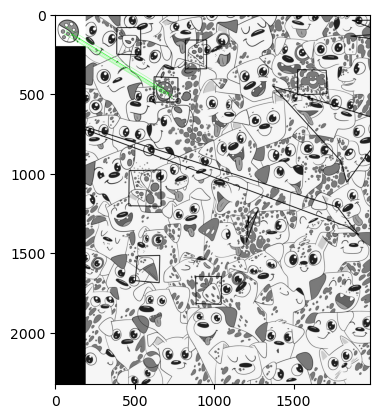

(<matplotlib.image.AxesImage at 0x1ebd44bbfd0>, None)

In [ ]:
plt.imshow(result), plt.show()